Karthik Konath (kk28699), Kyle Polansky (kpp446)

# <center>EE 379K-DS Lab 4<center>

# Problem 1: PCA

##### 1.1 Generate 20 random points in d = 3 ... Create a 3D plot of the clouds of data points labeled with the two labels.

In [6]:
import numpy as np
mean=[0,0,0]
cov=[[0.5,0,0],[0,0.5,0],[0,0,0.7]]
rp1 = np.random.multivariate_normal(mean,cov,20)
print rp1

mean=[1,1,1]
cov=[[0.5,0,0],[0,0.5,0],[0,0,0.01]]
rp2 = np.random.multivariate_normal(mean,cov,20)
print rp2


[[ 0.55971357  0.54661129  0.40357255]
 [ 0.73948607 -0.88203893  0.04081321]
 [ 0.17991807 -1.08045792 -1.63651756]
 [-0.76984987 -0.05104065  0.40585639]
 [ 0.09327709 -1.33302742 -0.14625055]
 [ 0.19461201 -0.36448267 -0.18633656]
 [-0.19284089  0.98405778  0.47563596]
 [ 0.25566131  0.42505222 -0.92331476]
 [ 0.44435204 -0.07326824 -0.58398408]
 [-1.03054676 -1.39636747  0.90383732]
 [ 0.43525905  1.11095997 -0.75858576]
 [-0.33404393 -0.74282722 -0.17962995]
 [-0.23531901  0.13047153 -0.18341635]
 [ 0.06325663 -1.2012725  -0.72744424]
 [-0.08942517 -0.25735423 -1.2566234 ]
 [ 0.55161248  0.2642889   0.37745651]
 [ 0.53214998  0.59311219  1.2143878 ]
 [ 0.94177928  0.36492951 -1.74645194]
 [ 0.79281389 -0.90258213  0.19880742]
 [-0.78468053 -0.82025258 -0.68288561]]
[[ 1.91693257  0.7986816   1.12221177]
 [ 2.4743164   0.67295193  1.08029492]
 [ 0.98526811  1.70236023  0.90436606]
 [ 0.66119166  0.19108517  1.0570374 ]
 [ 0.54511456  1.59578419  1.2470666 ]
 [ 0.88417549  1.7655179

##### 1.2 What do the points look like?

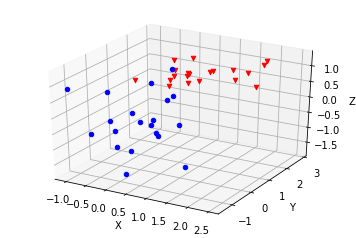

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
n=0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
while(n<len(rp1)):
    ax.scatter(rp1[n][0],rp1[n][1],rp1[n][2],c='b',marker='o')
    ax.scatter(rp2[n][0],rp2[n][1],rp2[n][2],c='r',marker='v')
    n+=1
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

##### 1.3 Concatenate all the points and ignore the labels. Find the covariance of this dataset.

In [8]:
rp = np.concatenate([rp1,rp2])
#Manually calculate mean
rpSum = np.sum(rp, axis=0)
rpMean = np.divide(rpSum,rp.shape[0])

#Manually calculate covariance matrix
rpdiff = np.subtract(rp,rpMean)
rpdiffmultxy = np.multiply(rpdiff[:,0],rpdiff[:,1])
rpdiffmultsumxy = np.sum(rpdiffmultxy)
rpdiffmultyz = np.multiply(rpdiff[:,1],rpdiff[:,2])
rpdiffmultsumyz = np.sum(rpdiffmultyz)
rpdiffmultxz = np.multiply(rpdiff[:,0],rpdiff[:,2])
rpdiffmultsumxz = np.sum(rpdiffmultxz)
covarxy = np.divide(rpdiffmultsumxy,rp.shape[0]-1)
covaryz = np.divide(rpdiffmultsumyz,rp.shape[0]-1)
covarxz = np.divide(rpdiffmultsumxz,rp.shape[0]-1)
varx = np.divide(np.sum(np.square(rp[:,0]-rpMean[0])),rp.shape[0]-1)
vary = np.divide(np.sum(np.square(rp[:,1]-rpMean[1])),rp.shape[0]-1)
varz = np.divide(np.sum(np.square(rp[:,2]-rpMean[2])),rp.shape[0]-1)
COV = [[varx,covarxy,covarxz],[covarxy,vary,covaryz],[covarxz,covaryz,varz]]
print("COV: ", COV)
print("Real Cov", np.cov(rp,rowvar=False))


('COV: ', [[0.58500362444968368, 0.46242701902825234, 0.26034999285248789], [0.46242701902825234, 1.0767092153646178, 0.47668255104907714], [0.26034999285248789, 0.47668255104907714, 0.71337521801436299]])
('Real Cov', array([[ 0.58500362,  0.46242702,  0.26034999],
       [ 0.46242702,  1.07670922,  0.47668255],
       [ 0.26034999,  0.47668255,  0.71337522]]))


##### 1.4 Find the two eigenvectors of the covariance matrix with the largest eigenvalues. Project the data points on these two vectors and show the two dimensional plot with the clouds of points. Also show the labels of the points. Did PCA make it easier to distinguish the two labels in two dimensions?

In [25]:
w,v = np.linalg.eig(COV);
print ("Eigenvalues: ", w)
print ("Eigenvectors: ",v)
min = 0
if(w[1]<w[min]):
    min=1
if(w[2]<w[min]):
    min=2
w = np.delete(w,min)
v= np.delete(v,min,0)
print "Max Eigenvalues: " , str(w[0]) , str(w[1])
print "Corresponding Eigenvectors: ", v

('Eigenvalues: ', array([ 1.66437815,  0.3032901 ,  0.4074198 ]))
('Eigenvectors: ', array([[-0.44028668, -0.79661675, -0.41418522],
       [-0.74858172,  0.58040456, -0.32055569],
       [-0.49575502, -0.16891509,  0.85187713]]))
Max Eigenvalues:  1.66437815347 0.407419802524
Corresponding Eigenvectors:  [[-0.44028668 -0.79661675 -0.41418522]
 [-0.49575502 -0.16891509  0.85187713]]


# Problem 2: Low rank approximation of Mona Lisa

##### 2.1 Load the Mona Lisa image (in grayscale) and treat it as a matrix M. Perform a singular valuedecomposition on this matrix usinglinalg.svd.  You can perform a low-rank approximationby zeroing out singular values and keeping only the top $k$.  Show the best rank $k$= 2, $k$= 5 and $k$= 10 approximation to Mona Lisa.

##### 2.2 If each pixel is represented by two bytes, how many bits is your compressed Mona Lisa foreach of thosekrank approximations?

# Problem 3: Using Low Rank Structure for Corrupted Entries

##### Download filesCorrMat1.csv and CorrMat3.csv from Canvas. These are each 100 by 100 matrices. Look at the data and find which entries are corrupted. Then try to correct these corrupted entries. Explain  your  approach.  (Hint:  The  corrupted  entries  have  values  that  are  completely out of the range of the others. This should help you identify which are the corrupted ones.  For completing them, the hint is that we have been talking about PCA, low rank matrices and low-rankapproximations.)

In [48]:
import heapq
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
CM1 = open("CorrMat1.csv", 'r')
CM3 = open("CorrMat3.csv", 'r')
df1 = pd.read_csv(CM1, sep = ',', header = None)
df3 = pd.read_csv(CM3, sep = ',', header = None)
df1f = pca.fit(df1)

#w,v = np.linalg.eig(df1.cov())
#print "The indexes for the eigenvectors are: ",np.argpartition(w, -2)[-2:]
#w,v = np.linalg.eig(df3.cov())
#print "The indexes for the eigenvectors are: ",np.argpartition(w, -2)[-2:]



[ -775.20417236  -771.61300704  -783.47175945  -779.68617649  -779.37048532
  -771.93615146  -779.68617649  -769.71071729 -1016.92824723  -776.74266025
  -779.05953626  -769.02986401  -788.58214763  -782.74079254  -788.341854
  -789.11721889  -777.29342652  -783.84435609  -769.02850377  -769.13350121
  -782.38242227  -769.21481612  -897.06322904  -915.76310118  -786.99584558
  -770.0724788   -769.42482973  -859.17013753  -776.47439029  -773.62503637
  -780.9963624   -977.19235523  -778.75332934  -778.75332934  -795.62412568
  -958.02604688  -840.36861058 -1005.50797299  -769.48918843  -782.74079254
  -769.13826205  -778.75332934  -773.01939564  -787.41112131  -769.42482973
  -769.04205937  -771.30883112  -829.24990369  -769.17416802  -769.36521314
  -769.17416802  -795.20583675  -787.41112131 -1355.08687421 -1067.38724467
  -958.30005251  -771.77220819  -784.22169484  -770.28181229 -1219.26024253
  -785.23623902  -908.07766404  -780.00660978  -784.22169484  -783.84435609
  -774.2733562

# Problem 4: Getting more into Kaggle

##### 4.2 Train a ridge regression and a lasso regression model.  Optimize the alphas using cross vali-dation.  What is the best score you can get from a single ridge regression model and from asingle lasso model?

##### 4.3 Plot the $l_0$ norm (number of nonzeros) of the coefficients that lasso produces as you vary alpha.

##### 4.4 Add the outputs of your models as features and train a ridge regression on all the features plus the model outputs (This is called Ensembling and Stacking). Be careful not to overfit. What score can you get?

##### 4.5 Install XGBoost (Gradient Boosting) and train a gradient boosting regression. What score can you get just from a single XGB? (you will need to optimize over its parameters).

##### 4.9 You will be graded based on your public score (include that in your report) and also on the creativity of your solution. In your report (that you will submit as a pdf file), explain what worked and what did not work.